In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('all_result_tables_brute.csv', sep=';', decimal=',')
df = df[df['Model'] != 'gemma3_4b']
df['Font'] = df['Font'].replace('data', 'raw')
df.head()

,Model,Font,Accuracy,Precision,Recall,F1 Score,Test,Threads
0,deepseek-r1_14b_no_think,raw,0.783333,0.791667,0.926829,0.853933,0,1
1,deepseek-r1_14b_no_think,gemma3_4b,0.850000,0.833333,0.975610,0.898876,0,1
2,deepseek-r1_14b_no_think,llama3.2_3b,0.850000,0.847826,0.951220,0.896552,0,1
3,deepseek-r1_14b_no_think,phi4-mini,0.833333,0.803922,1.000000,0.891304,0,1
4,deepseek-r1_14b_no_think,tinyllama_1.1b,0.866667,0.866667,0.951220,0.906977,0,1


### Média por modelo

In [10]:
media_modelo = df.groupby('Model').agg({
    'Accuracy': 'mean',
    'Precision': 'mean',
    'Recall': 'mean',
    'F1 Score': 'mean'
}).sort_values(by='F1 Score', ascending=False).reset_index()

display(media_modelo)

,Model,Accuracy,Precision,Recall,F1 Score
0,deepseek-r1_14b_no_think,0.850000,0.832393,0.978862,0.899326
1,deepseek-r1_14b_think,0.836944,0.852273,0.922764,0.885521
2,selecao_dinamica,0.831111,0.850626,0.914634,0.880870
3,voto_ponderado,0.830833,0.850030,0.915041,0.880739
4,qwen3_14b_no_think,0.826389,0.884345,0.858130,0.870566
5,voto_majoritario,0.797500,0.781918,0.977236,0.868450
6,qwen3_14b_think,0.772707,0.798786,0.893028,0.842676
7,phi4,0.730606,0.717571,0.999557,0.835355
8,gemma3_12b,0.706667,0.699708,1.000000,0.823313
9,mistral-nemo,0.695942,0.692450,0.998780,0.817831


### Média por fonte

In [11]:
media_fonte = df.groupby('Font').agg({
    'Accuracy': 'mean',
    'Precision': 'mean',
    'Recall': 'mean',
    'F1 Score': 'mean'
}).sort_values(by='Recall', ascending=False).reset_index()

display(media_fonte)

,Font,Accuracy,Precision,Recall,F1 Score
0,phi4-mini,0.788056,0.785513,0.964024,0.863030
1,gemma3_4b,0.794722,0.796754,0.959553,0.866905
2,llama3.2_3b,0.794089,0.803278,0.943669,0.863809
3,raw,0.784722,0.797467,0.940447,0.858261
4,tinyllama_1.1b,0.767874,0.790088,0.921138,0.845423


## Gráficos

### Média das métricas por modelo

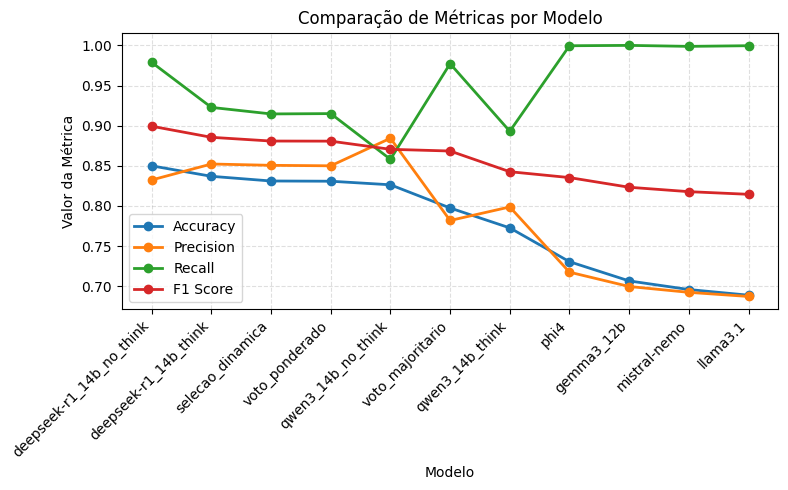

In [12]:
import matplotlib.pyplot as plt

media_ordenada = media_modelo.sort_values(by="F1 Score", ascending=False)

plt.figure(figsize=(8,5))
for m in ["Accuracy", "Precision", "Recall", "F1 Score"]:
    plt.plot(
        media_ordenada["Model"],
        media_ordenada[m],
        marker="o",
        linestyle="-",
        linewidth=2,
        markersize=6,
        label=m
    )

plt.xticks(rotation=45, ha="right")
plt.xlabel("Modelo")
plt.ylabel("Valor da Métrica")
plt.title("Comparação de Métricas por Modelo")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()



### Média das métricas por fonte

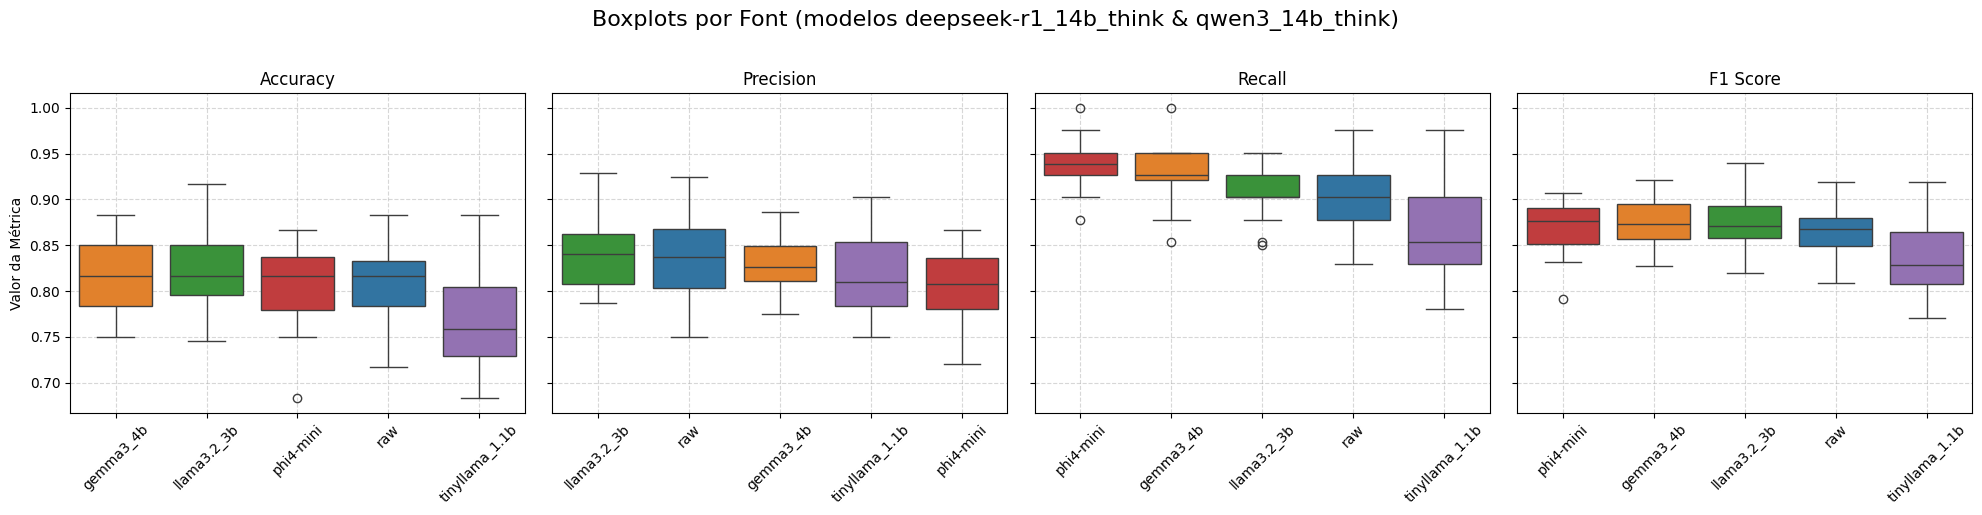

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtra apenas os modelos desejados
df_filtrada = df[df["Model"].isin([
    "deepseek-r1_14b_think",
    "qwen3_14b_think",
])].copy()

# Lista de métricas a plotar
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

# “Derrete” o df_filtrada para ter uma coluna Métrica e uma coluna Valor, usando "Font" como id
df_melt = df_filtrada.melt(
    id_vars="Font",
    value_vars=metrics,
    var_name="Métrica",
    value_name="Valor"
)

# Paleta de cores para cada Font presente em df_filtrada
fonts = df_filtrada["Font"].unique()
palette = dict(zip(fonts, sns.color_palette("tab10", len(fonts))))

# Cria uma figura com um subplot para cada métrica
n = len(metrics)
fig, axes = plt.subplots(1, n, figsize=(5 * n, 5), sharey=True)

for ax, m in zip(axes, metrics):
    data = df_melt[df_melt["Métrica"] == m]
    
    # Ordena as fontes pela mediana do valor da métrica (descendente)
    order = (
        data
        .groupby("Font")["Valor"]
        .median()
        .sort_values(ascending=False)
        .index
        .tolist()
    )
    
    sns.boxplot(
        x="Font",
        y="Valor",
        hue="Font",
        data=data,
        order=order,
        palette={f: palette[f] for f in order},
        dodge=False,
        legend=False,
        ax=ax
    )
    ax.set_title(m)
    ax.set_xlabel("")  
    if ax is axes[0]:
        ax.set_ylabel("Valor da Métrica")
    else:
        ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.5)

fig.suptitle("Boxplots por Font (modelos deepseek-r1_14b_think & qwen3_14b_think)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


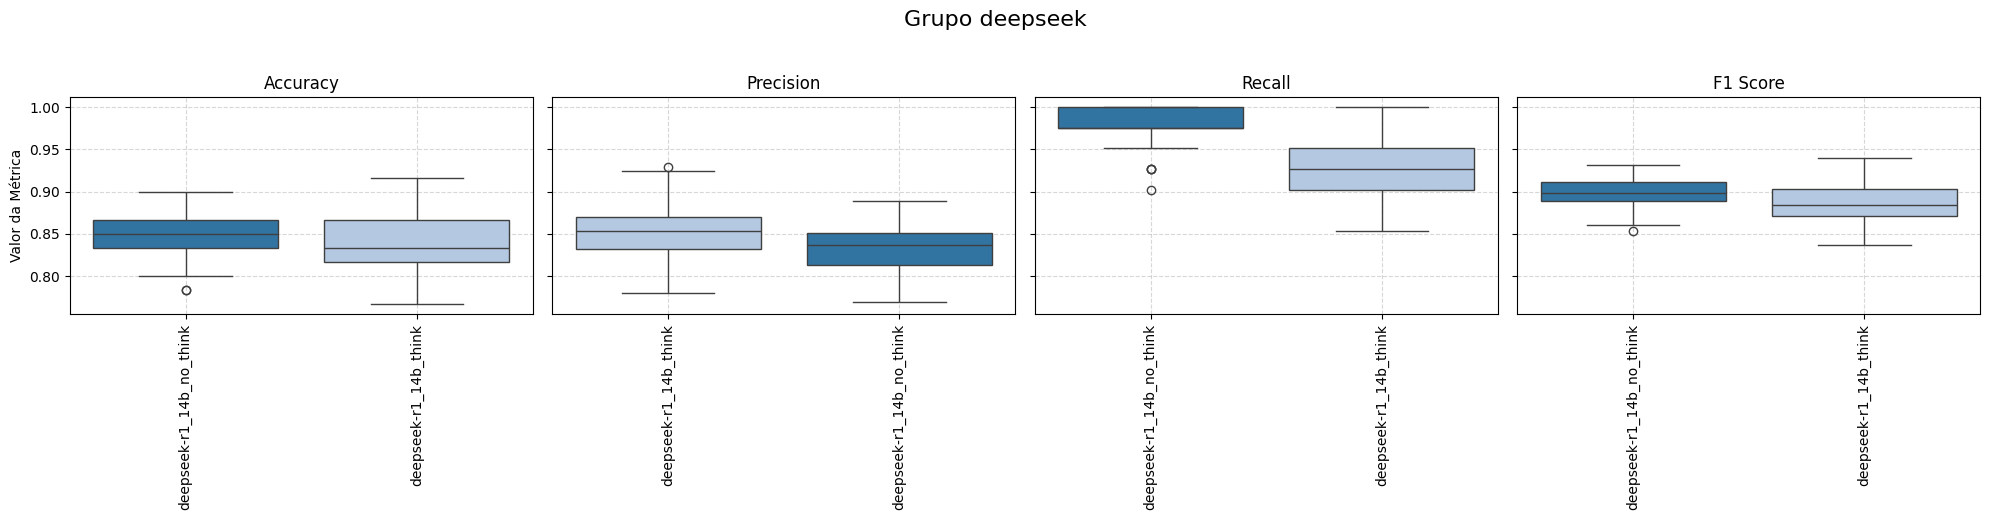

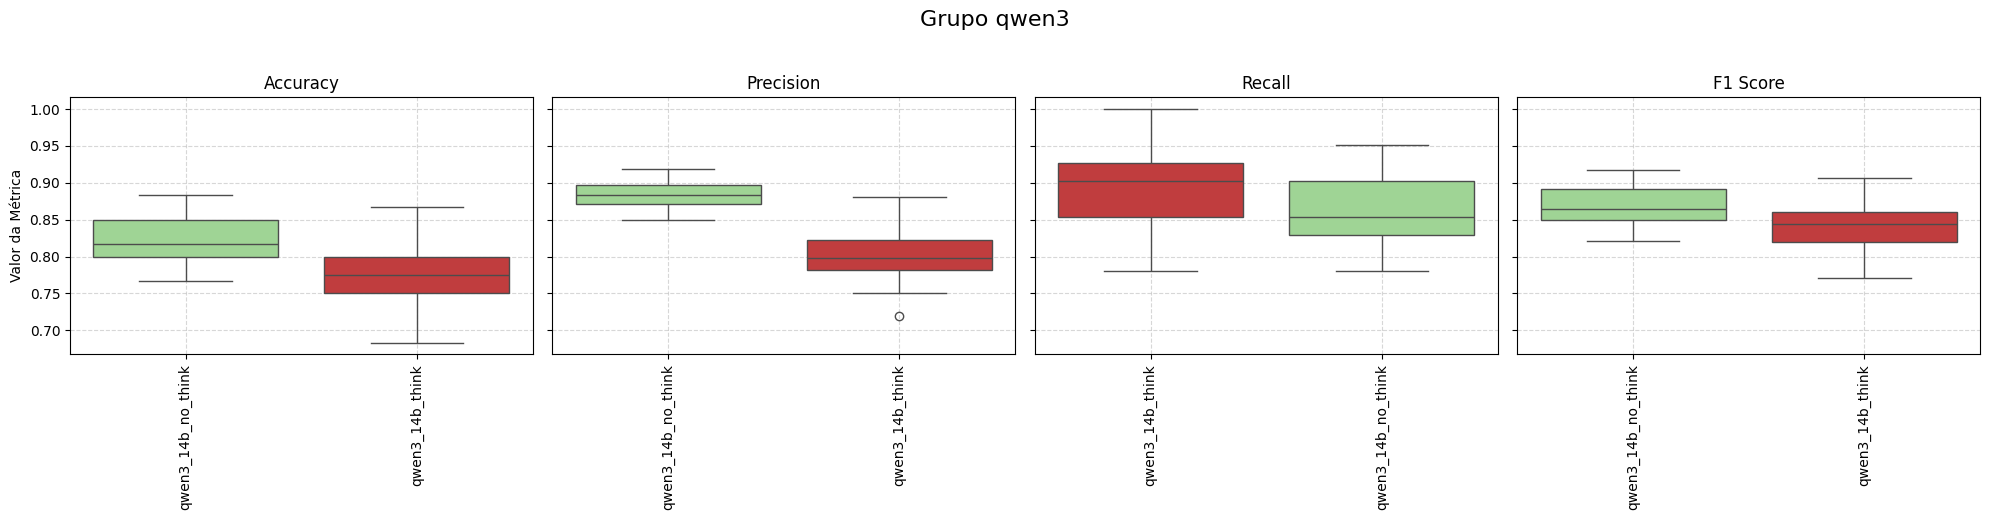

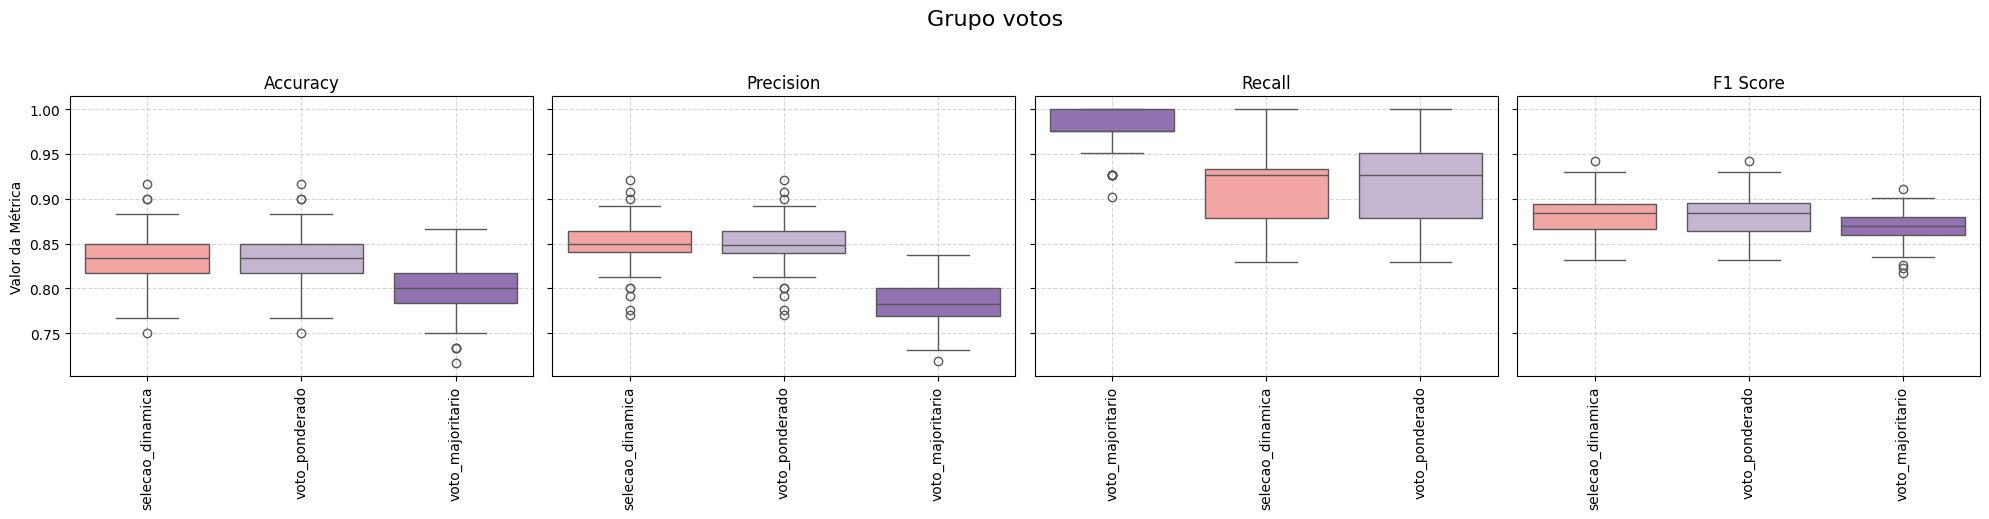

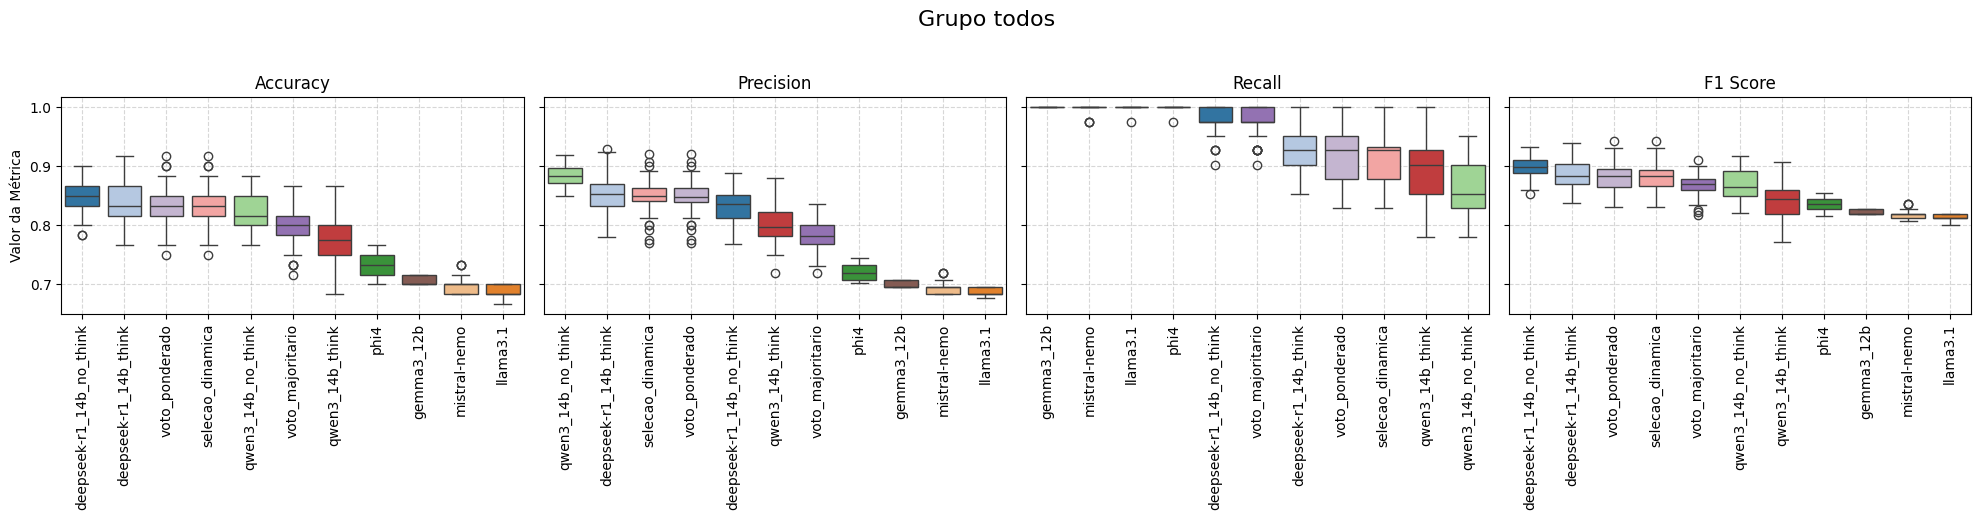

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# “derrete” o df para ter uma coluna Métrica e uma coluna Valor
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
df_melt = df.melt(
    id_vars="Model",
    value_vars=metrics,
    var_name="Métrica",
    value_name="Valor"
)

# define uma cor única para cada modelo
all_models = df["Model"].unique()
palette = dict(zip(all_models, sns.color_palette("tab20", len(all_models))))

# Define os quatro grupos de modelos
groups = {
    "deepseek": ["deepseek-r1_14b_no_think", "deepseek-r1_14b_think"],
    "qwen3": ["qwen3_14b_no_think", "qwen3_14b_think"],
    "votos": ["voto_majoritario", "voto_ponderado", "selecao_dinamica"],
    "todos": list(all_models)
}

# Para cada grupo, cria uma figura com subplots lado a lado por métrica
for nome, modelos in groups.items():
    subset = df_melt[df_melt["Model"].isin(modelos)]
    n = len(metrics)
    fig, axes = plt.subplots(1, n, figsize=(5 * n, 5), sharey=True)
    
    for ax, m in zip(axes, metrics):
        data = subset[subset["Métrica"] == m]
        
        # ordena os modelos pela mediana da métrica, descendo
        order = (
            data
            .groupby("Model")["Valor"]
            .median()
            .sort_values(ascending=False)
            .index
            .tolist()
        )
        
        sns.boxplot(
            x="Model",
            y="Valor",
            hue="Model",
            data=data,
            order=order,
            palette={model: palette[model] for model in order},
            dodge=False,
            legend=False,
            ax=ax
        )
        ax.set_title(m)
        ax.set_xlabel("")  
        if ax is axes[0]:
            ax.set_ylabel("Valor da Métrica")
        else:
            ax.set_ylabel("")
        ax.tick_params(axis='x', rotation=90)
        ax.grid(True, linestyle='--', alpha=0.5)

    fig.suptitle(f"Grupo {nome}", fontsize=16, y=1.03)
    plt.tight_layout()
    plt.show()


### 